In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from Thermography_Dataset import ThermDataset

spectrum_train = pd.read_excel("spectrum_train.xlsx")
spectrum_test = pd.read_excel("spectrum_valid.xlsx")
temp_train = pd.read_excel("temp_train.xlsx")
temp_test = pd.read_excel("temp_valid.xlsx")

In [10]:
combined = pd.read_excel("combined_data.xlsx")

In [16]:
combined.iloc[:,11:].shape

(2200, 66)

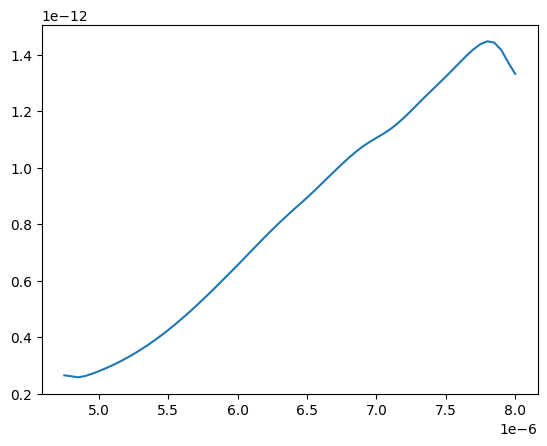

In [7]:
plt.plot(spectrum_train.iloc[40])

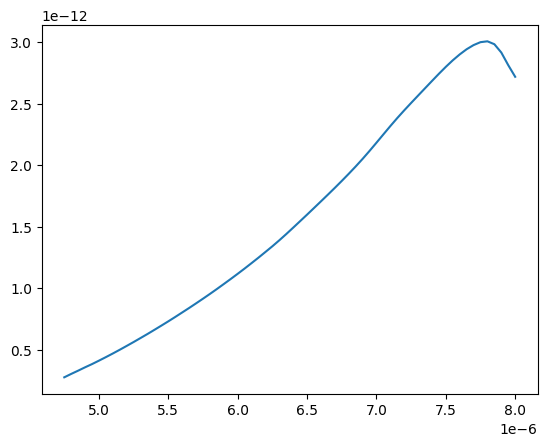

In [4]:
plt.plot(spectrum_test.iloc[20])

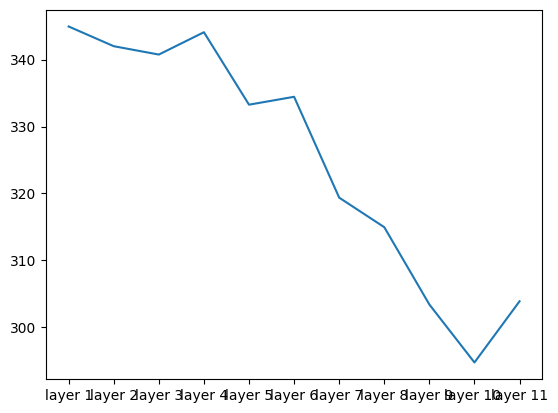

In [5]:
plt.plot(temp_train.iloc[30])

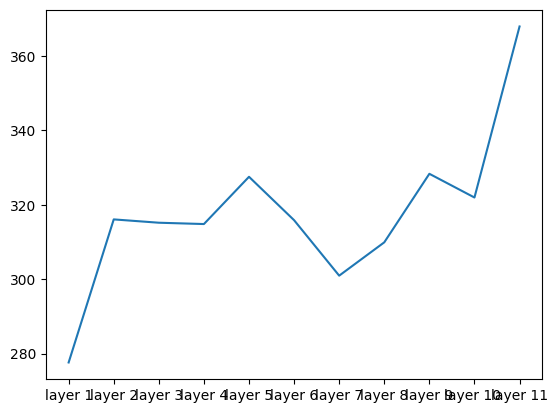

In [6]:
plt.plot(temp_test.iloc[50])

In [18]:
dataset = ThermDataset('combined_data.xlsx')

In [20]:
def add_noise(df, scale):
    noise = pd.DataFrame(np.random.normal(loc=0, scale=scale, size=df.shape), columns=df.columns)

    df_noisy = noise.add(df)

    return df_noisy

In [25]:
temp_train

,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11
0,323.542814,336.264134,314.373562,319.809810,322.683987,320.738026,321.123277,336.022206,327.239350,315.435360,306.809772
1,302.397305,308.020770,308.339731,314.529630,310.125411,324.512867,337.688990,339.958209,333.648389,332.220250,301.797698
2,342.253199,327.857420,322.749776,315.650814,316.674735,323.569400,324.433852,311.388109,315.627234,299.074724,327.954011
3,321.522941,345.488846,332.206767,323.959885,307.920920,307.908732,312.082073,324.729747,325.913700,331.626889,286.208296
4,345.272454,304.685696,311.402060,310.023810,322.799370,332.113227,334.099515,332.219769,333.842680,329.993893,346.495754
...,...,...,...,...,...,...,...,...,...,...,...
1995,301.910744,336.426122,335.313084,332.618147,326.017401,312.212826,293.840116,292.102242,293.892008,288.039673,297.384889
1996,372.711845,331.996217,339.521525,333.866750,331.912425,337.177115,327.628874,314.707999,304.663765,294.496732,294.216799
1997,281.857159,303.590926,308.725933,317.387679,321.682391,333.974251,330.288332,326.727931,324.592481,303.704642,314.488639
1998,327.769935,299.169325,317.122257,313.736682,325.639582,328.573713,329.756684,328.925934,327.803454,331.698024,305.229661


In [27]:
add_noise(temp_train, 10)

,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11
0,317.382536,335.610988,306.576315,312.464225,318.875178,305.445646,329.553457,331.150357,332.493837,305.463171,302.113576
1,318.437627,306.786162,301.487589,322.798284,303.403359,341.198360,322.912847,347.635180,354.911677,341.550448,280.819975
2,365.387047,328.982348,315.618848,296.848517,320.981301,319.909608,303.612686,321.252960,309.734660,300.609189,333.724429
3,330.046544,361.523601,312.067020,313.698122,287.680607,303.806343,319.525281,320.209490,323.351731,330.426280,271.847380
4,363.147121,317.067394,291.376565,304.460225,331.350573,343.049955,334.278450,345.030343,324.509295,340.050381,348.441056
...,...,...,...,...,...,...,...,...,...,...,...
1995,292.968034,340.759565,350.860501,338.571370,326.749260,319.148708,305.589296,297.920303,294.141524,288.049616,291.405525
1996,363.017337,329.104779,355.682370,337.822081,327.140231,338.006569,333.886698,316.514379,295.024256,294.846009,280.380330
1997,279.159497,295.539306,318.230053,321.422866,325.709953,334.442595,339.478088,327.952940,322.279029,302.754335,300.604508
1998,338.678818,299.825643,325.902132,290.668074,324.553457,330.528205,342.695136,335.561392,319.175468,341.498555,294.824684
